In [108]:
import pandas as pd
import os
from glob import glob
import re
import matplotlib.font_manager as fm

# 查看系统可用的中文字体
def show_chinese_fonts():
    """显示系统中可用的中文字体"""
    fonts = [f.name for f in fm.fontManager.ttflist if 'Hei' in f.name or 'Song' in f.name or 'Kai' in f.name]
    print("可用的中文字体:")
    for font in set(fonts):
        print(f"  - {font}")
    return list(set(fonts))

fonts = show_chinese_fonts()
plt.rcParams['font.sans-serif'] = [fonts[0]]
plt.rcParams['axes.unicode_minus'] = False


可用的中文字体:
  - BiauKaiHK
  - LiSong Pro
  - Kai
  - Noto Sans Kaithi
  - Hei
  - Songti SC
  - Kailasa
  - SimSong
  - LiHei Pro
  - Heiti TC
  - STHeiti
  - Kaiti SC


In [109]:
num=70
files = glob("data/*.txt")
files = [f for f in files if "23" in f or "25" in f or "24" in f]
df = pd.DataFrame(index=range(num*len(files)),columns=["城市","环比","同比","平均","月份"])
    
for i,filename in enumerate(files):
    month = filename.split("-")[1].split(".")[0]
    print(f"processing file {filename}, month={month}")
    idx = i*num
    df.iloc[idx:idx+num,-1] = [month]*num
    with open(filename) as fp:
        data = fp.readlines()
    data = [text.strip() for text in data if text.strip()]        

    row = []
    n=3 if month in ["2401","2501"] else 4
    for i,line in enumerate(data):
        row.append(line)
        if i>0 and (i+1)%n==0:
            df.iloc[idx+(i+1)//n-1,:n] = row
            row = []
df

processing file data/price-2308.txt, month=2308
processing file data/price-2309.txt, month=2309
processing file data/price-2408.txt, month=2408
processing file data/price-2409.txt, month=2409
processing file data/price-2401.txt, month=2401
processing file data/price-2402.txt, month=2402
processing file data/price-2403.txt, month=2403
processing file data/price-2407.txt, month=2407
processing file data/price-2406.txt, month=2406
processing file data/price-2412.txt, month=2412
processing file data/price-2404.txt, month=2404
processing file data/price-2410.txt, month=2410
processing file data/price-2411.txt, month=2411
processing file data/price-2405.txt, month=2405
processing file data/price-2502.txt, month=2502
processing file data/price-2304.txt, month=2304
processing file data/price-2310.txt, month=2310
processing file data/price-2311.txt, month=2311
processing file data/price-2305.txt, month=2305
processing file data/price-2503.txt, month=2503
processing file data/price-2501.txt, mon

城市     环比     同比     平均    月份
0      北　　京   99.8  102.8  104.1  2308
1      唐　　山   99.7   98.8   98.3  2308
2      天　　津   99.6  100.6   99.2  2308
3     秦 皇 岛   99.9   96.4   95.4  2308
4     石 家 庄   99.3   99.3   98.8  2308
...     ...    ...    ...    ...   ...
2025   南　　充  100.5   98.2   98.2  2301
2026   银　　川  100.1  100.9  100.9  2301
2027   遵　　义  100.2   99.5   99.5  2301
2028   乌鲁木齐  100.3  101.8  101.8  2301
2029   大　　理   99.4   95.3   95.3  2301

[2030 rows x 5 columns]

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

df['rate'] = df['环比'].apply(lambda x: float(x)/100)
df2 = pd.pivot(df,values='rate',index='月份',columns='城市')
df2=df2.cumprod(axis=0)
df2

城市        三　　亚      上　　海      丹　　东      乌鲁木齐      九　　江      兰　　州      包　　头  \
月份                                                                           
2301  1.003000  1.007000  1.001000  1.003000  1.002000  0.999000  0.999000   
2302  1.008015  1.009014  0.997997  1.007012  1.003002  1.003995  1.003995   
2303  1.015071  1.013050  0.993007  1.015068  1.007014  1.010019  1.002991   
2304  1.016086  1.017102  0.995986  1.016083  1.011042  1.014059  1.007003   
2305  1.022183  1.020154  0.992002  1.019131  1.012053  1.019129  1.004989   
2306  1.025249  1.024234  0.992994  1.015055  1.010029  1.021168  1.000969   
2307  1.027300  1.026283  0.994980  1.013025  1.009019  1.022189  0.994963   
2308  1.031409  1.027309  0.992990  1.014038  1.004983  1.017078  0.987998   
2309  1.032440  1.032445  0.987032  1.012010  0.999958  1.011992  0.980094   
2310  1.033473  1.034510  0.986045  1.007962  0.988958  0.998837  0.977154   
2311  1.032439  1.040717  0.983087  1.006954  0.985003  0.998837  0.975200   
2312  1.029342  1.042799  0.980138  1.001919  0.981063  0.992844  0.971299   
2401  1.029342  1.046970  0.975237  0.997911  0.973214  0.987879  0.968385   
2402  1.026254  1.049064  0.972311  0.997911  0.966402  0.981952  0.962575   
2403  1.023175  1.054309  0.968422  0.994918  0.960603  0.980970  0.958725   
2404  1.019083  1.057472  0.958738  0.989943  0.952918  0.975084  0.952972   
2405  1.011949  1.063817  0.951068  0.987963  0.936719  0.970209  0.948207   
2406  1.012961  1.068072  0.946313  0.981047  0.926415  0.955656  0.939673   
2407  1.005870  1.070208  0.944420  0.976142  0.918077  0.943232  0.931216   
2408  1.000841  1.076630  0.938753  0.974190  0.917159  0.927197  0.925629   
2409  0.992834  1.083090  0.931243  0.971267  0.915325  0.922561  0.918224   
2410  0.988863  1.086339  0.927518  0.970296  0.912579  0.915181  0.911797   
2411  0.984907  1.092857  0.922881  0.970296  0.903453  0.914266  0.908149   
2412  0.990817  1.098321  0.919189  0.971266  0.900743  0.912437  0.905425   
2501  0.992798  1.104911  0.913674  0.967381  0.897140  0.912437  0.904519   
2502  0.991806  1.107121  0.910020  0.966414  0.897140  0.910612  0.900901   
2503  0.989822  1.114871  0.903649  0.967380  0.894448  0.906059  0.895496   
2504  0.991802  1.120445  0.902746  0.970282  0.890870  0.902435  0.891914   
2505  0.992793  1.128288  0.900940  0.974164  0.892652  0.901532  0.889238   

城市        北　　京      北　　海      南　　京  ...      遵　　义      郑　　州      重　　庆  \
月份                                  ...                                 
2301  1.004000  1.004000  1.000000  ...  1.002000  1.002000  1.003000   
2302  1.006008  1.010024  1.003000  ...  1.010016  1.008012  1.010021   
2303  1.009026  1.019114  1.008015  ...  1.019106  1.017084  1.019111   
2304  1.015080  1.023191  1.013055  ...  1.024202  1.022170  1.026245   
2305  1.017110  1.028307  1.010016  ...  1.019081  1.020125  1.025219   
2306  1.018127  1.030363  1.007996  ...  1.018062  1.017065  1.023168   
2307  1.022200  1.033454  1.006988  ...  1.020098  1.009945  1.026238   
2308  1.020156  1.036555  1.002960  ...  1.016017  1.004896  1.027264   
2309  1.024236  1.032408  0.994936  ...  1.013985  0.998866  1.029319   
2310  1.020139  1.024149  0.987972  ...  1.007901  0.989876  1.028289   
2311  1.019119  1.019028  0.978092  ...  1.003870  0.985917  1.026233   
2312  1.019119  1.012914  0.966355  ...  0.999854  0.980987  1.020075   
2401  1.018100  1.008863  0.961523  ...  0.997855  0.977063  1.021095   
2402  1.017082  1.012898  0.950946  ...  0.993863  0.972178  1.021095   
2403  1.017082  1.016950  0.939535  ...  0.995851  0.965373  1.024159   
2404  1.009962  1.010848  0.932019  ...  0.997843  0.957650  1.010845   
2405  0.998853  1.005794  0.921767  ...  0.994849  0.952862  0.996693   
2406  0.992860  1.001771  0.910705  ...  0.986890  0.946192  0.987723   
2407  0.987895  0.998765  0.904330  ...  0.983930  0.938622  0.974882   
2408  0.982956  0.985781  0.907043  ...  0.98097

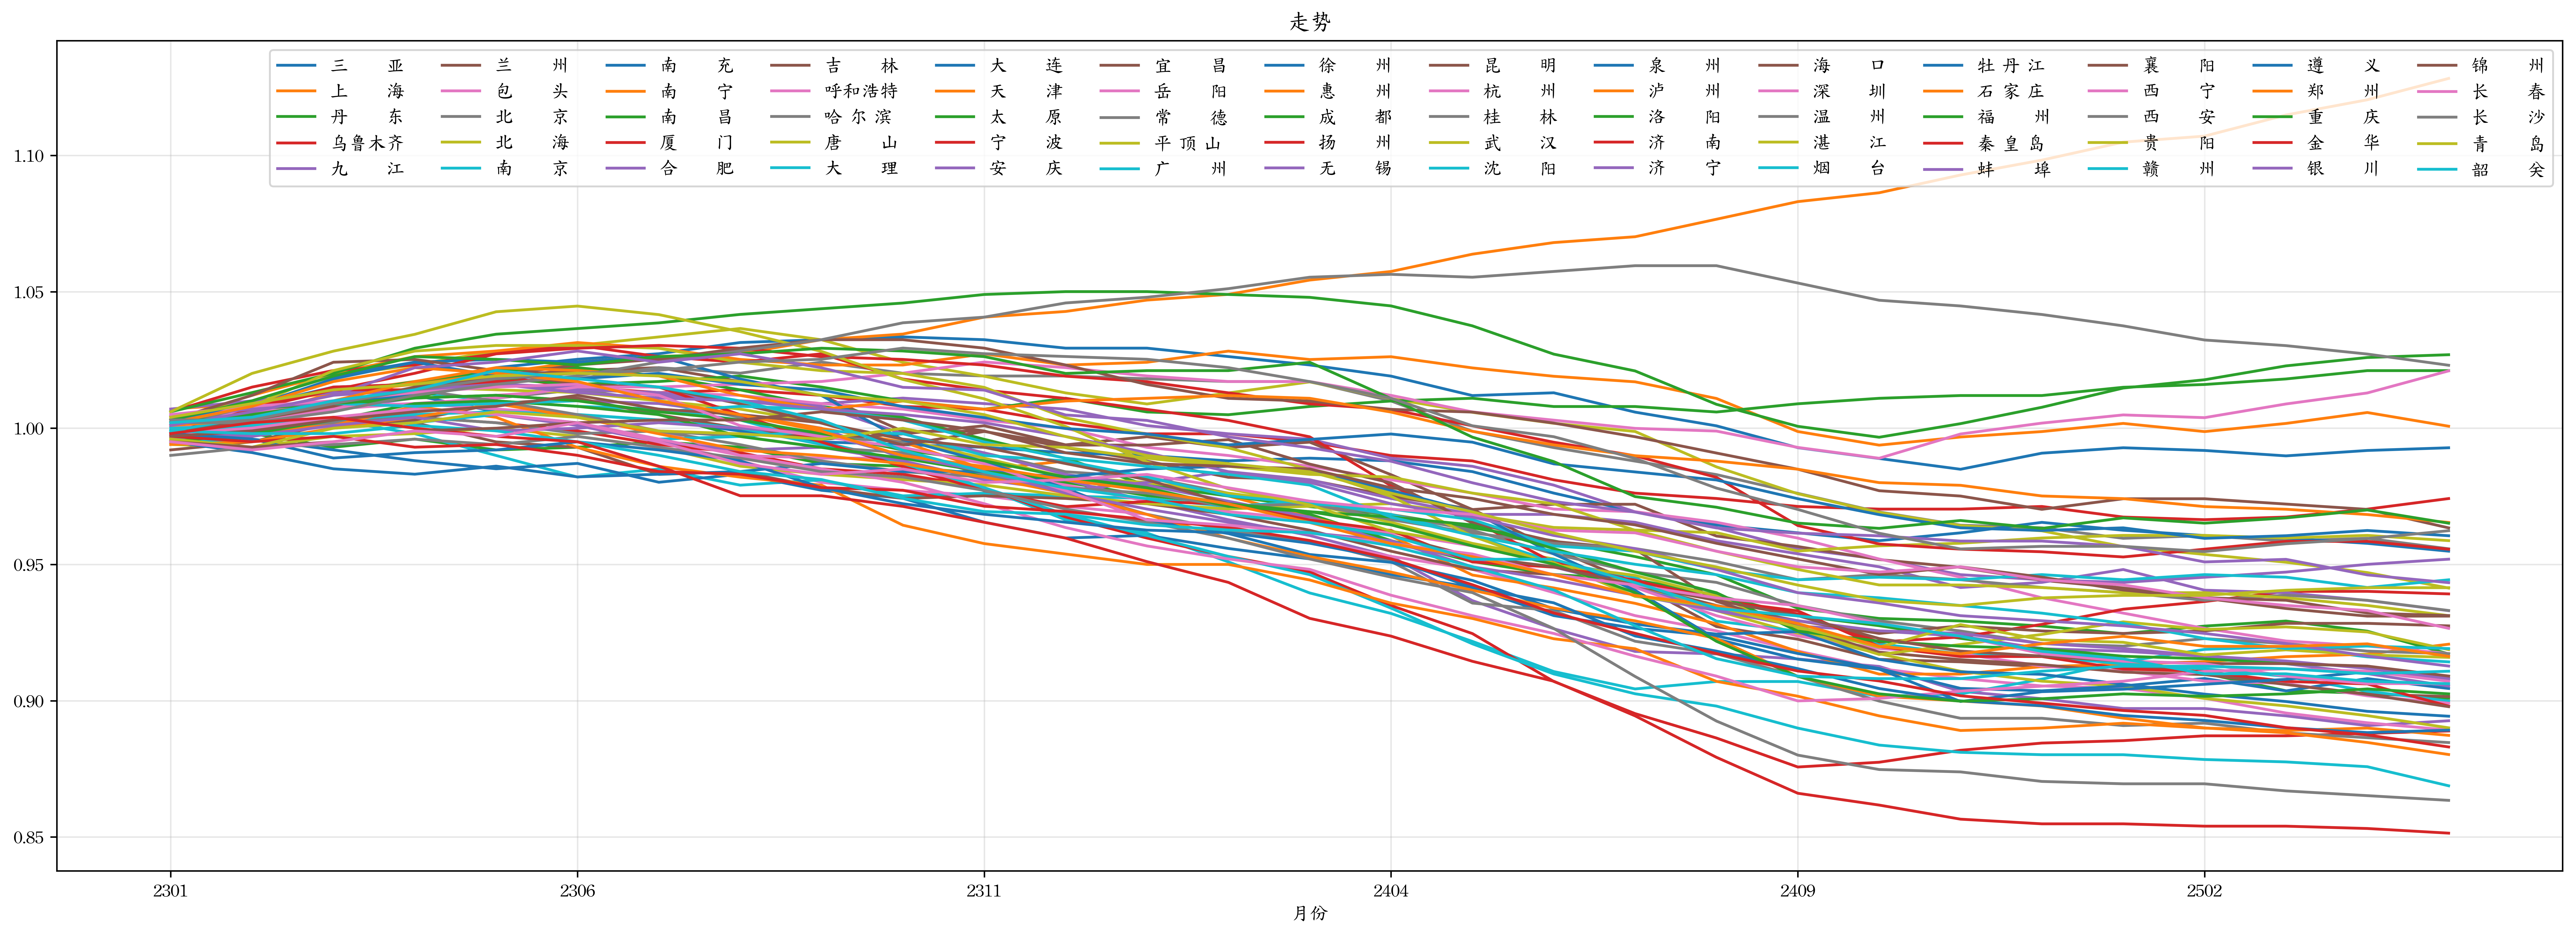

In [111]:
fig,ax=plt.subplots(1,1,figsize=(24,8), dpi=600)
df2.plot(ax=ax)
plt.legend(ncol=14, loc='upper right')
plt.title('走势')
plt.grid(True, alpha=0.3)
plt.show()

<Axes: xlabel='月份'>

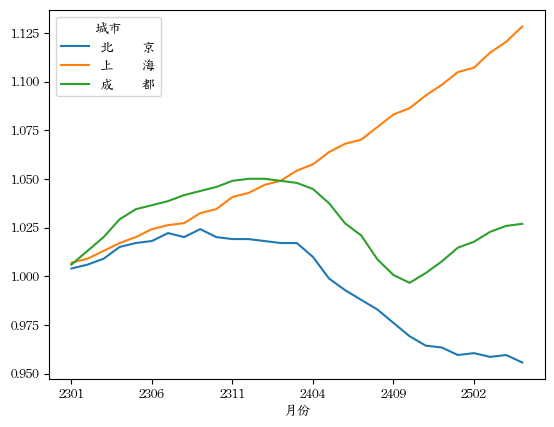

In [114]:
df2[["北　　京","上　　海","成　　都"]].plot()